<h3><center> Chebyshev Pseudospectral Method for 4th order ODE-BVP

In [585]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%config InlineBackend.figure_format = 'retina'

<h3>Differential Equation:</h3>
$$
u_{4x} + p(x)u_{xx} + q(x)u = f(x)
$$

<h3> Boundary conditions:</h3>
$$
u(-1) = \alpha_0 \\
u_x(-1) = \alpha_1 \\
u(1) = \beta_0 \\
u_x(1) = \beta_1
$$

In [524]:
# Initial and boundary conditions
# For the Solution u(x) = e^(x)
# Test 1:

alpha_0 = np.exp(-1)
alpha_1 = np.exp(-1)
beta_0 = np.exp(1)
beta_1 = np.exp(1)

p = lambda x: -x
q = lambda x: x
f = lambda x: np.exp(x)

In [500]:
"""
# Test 2
# Solution = x^4
alpha_0 = 1
alpha_1 = -4
beta_0 = 1
beta_1 = 4

p = lambda x: -x
q = lambda x: x
f = lambda x: 24 - 12*x**3 + x**5
#""";

<h3>Chebyshev Grid </h3>

$$x_i = cos(\frac{\pi i}{N-1} ); \ N = interpolation\ points. $$

In [577]:
N = 1000 # no. of basis functions
nn = np.arange(N)
x = np.cos(np.pi*nn/(N-1))

<h3> Chebyshev Polynomial

$$
T_{n+2} = 2xT_{n+1} - T_n
$$

In [578]:
# Format T[n,x] = nth chebyshev polynomial for the variable x
T = np.zeros((N,N))

T[0,:] = 1
T[1,:] = [x[q] for q in range(N)]

for n in range(N-2):
    T[n+2,:] = [(2*x[j]*T[n+1,j] - T[n,j]) for j in range(N)]  

<h3> Chebyshev differentiation matrix

Chebyshev kth derivative for nth basis function

$$
\frac{d^kT_{n+2}}{dx^k} =  2k\frac{d^{k-1}T_{n+1}}{dx^{k-1}} + 2x\frac{d^kT_{n+1}}{dx^k} - \frac{d^kT_{n}}{dx^k}
$$

In [579]:
# dT1 = 1st derivative, ...

dT1 = np.zeros((N,N))
dT2 = np.zeros((N,N))
dT3 = np.zeros((N,N))
dT4 = np.zeros((N,N))

dT1[0,:] = np.zeros((N))
dT2[0,:] = np.zeros((N))
dT3[0,:] = np.zeros((N))
dT4[0,:] = np.zeros((N))

dT1[1,:] = np.ones((N))
dT2[1,:] = np.zeros((N))
dT3[1,:] = np.zeros((N))
dT4[1,:] = np.zeros((N))

for n in range(N-2):
    dT1[n+2,:] = [(2*T[n+1,j] +   2*x[j]*dT1[n+1,j] - dT1[n,j]) for j in range(N)]
    dT2[n+2,:] = [(4*dT1[n+1,j] + 2*x[j]*dT2[n+1,j] - dT2[n,j]) for j in range(N)]
    dT3[n+2,:] = [(6*dT2[n+1,j] + 2*x[j]*dT3[n+1,j] - dT3[n,j]) for j in range(N)]
    dT4[n+2,:] = [(8*dT3[n+1,j] + 2*x[j]*dT4[n+1,j] - dT4[n,j]) for j in range(N)]

<h3>Matrix Discretization </h3>

We approximate $u(x)$ as
$$
u(x) = \sum_{j=1}^{N}(a_jT_{j-1}(x))
$$

Then, we can write the differential equation as:
$$
\bar{\bar{L}}.\bar{a} = \bar{F}
$$

where $\bar{\bar{L}}$ is the differential operator, $\bar{a}$ is the chebyshev coefficients and $\bar{F}$ is the right hand side forcing term.

The differential equation in matrix form is:

$$
\bar{\bar{L}}_{i+4,j} = T_{j-1,xxxx}(x_i) + p(x_i)T_{j-i,xx}(x_i) + q(x_i)T_{j-1}
\\
\bar{F}_{i+4} = f(x_i) 
$$

where $T_{j-1,xxxx}$ is the fourth Chebyshev derivative.

In [580]:
# Preallocation
# +4 for 4 boundary conditions
# Boundary bordering method
L = np.zeros((N+4,N))
a = np.zeros((N+4))
F = np.zeros((N+4))

In [581]:
# Matrix L for the differential operator
f2 = f(x)
p2 = p(x)
q2 = q(x)
for n in range(N):
    for j in range(N):
        L[n+4,j] = dT4[j,n] + p2[n]*dT2[j,n] + q2[n]*T[j,n]
        F[n+4] = f2[n]

In [582]:
# Boundary conditions at t = pi and 0; x = -1 and 1
Tn1 = np.array([np.cos(i*np.pi) for i in range(N)])
T1 = np.array([np.cos(i*0) for i in range(N)])
dT_dxn1 = np.array([j**2 for j in range(N)]) 
dT_dx1 = np.array([((-1)**(j+1))*j**2 for j in range(N)]) 

L[0,:] = Tn1;       F[0] = alpha_0
L[1,:] = dT_dx1;   F[1] = alpha_1
L[2,:] = T1;        F[2] = beta_0
L[3,:] = dT_dxn1;    F[3] = beta_1

In [583]:
# Invert the matrix to get spectral coefficients
M = np.dot(L.T,L)
Aprime = np.dot(np.linalg.inv(M), L.T)
A = np.dot(Aprime,F)

<h3> Test 1: </h3>
$$
u(x) = e^x \\
p(x) = -x \\
q(x) = x \\
f(x) = e^x
$$

/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


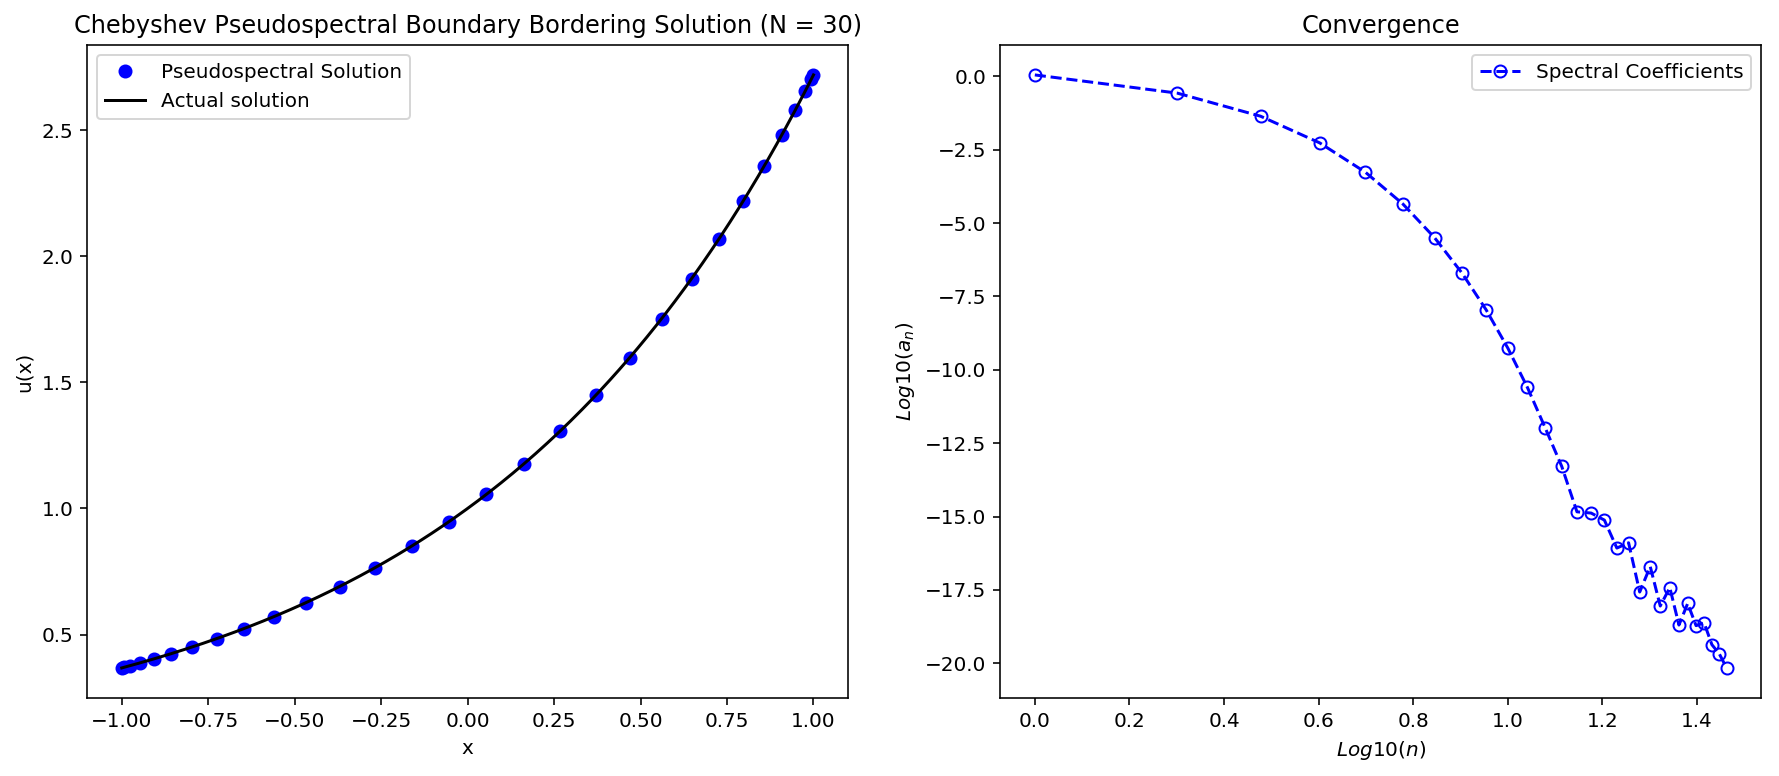

In [489]:
x2 = np.linspace(-1,1,10*N)

# actual solution
u = np.exp(x2)

# interpolated solution
u_int = np.dot(T,A)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)

ax1.plot(x, u_int, 'o', color='blue', label='Pseudospectral Solution')
ax1.plot(x2, u, color='black', label='Actual solution')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.set_title('Chebyshev Pseudospectral Boundary Bordering Solution (N = 30)')
ax1.legend()

ax2 = fig.add_subplot(122)

ax2.plot(np.log10(np.arange(N)), np.log10(np.abs(A)), 'o--',
                 color='blue', mfc='none', label='Spectral Coefficients')
ax2.set_xlabel('$Log10(n)$')
ax2.set_ylabel('$Log10(a_n)$')
ax2.set_title('Convergence')
ax2.legend()

plt.show()

<h6> The rate of convergence is super-geometric for this case.

<h3> Varying truncation results:

/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10
/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in log10
/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10


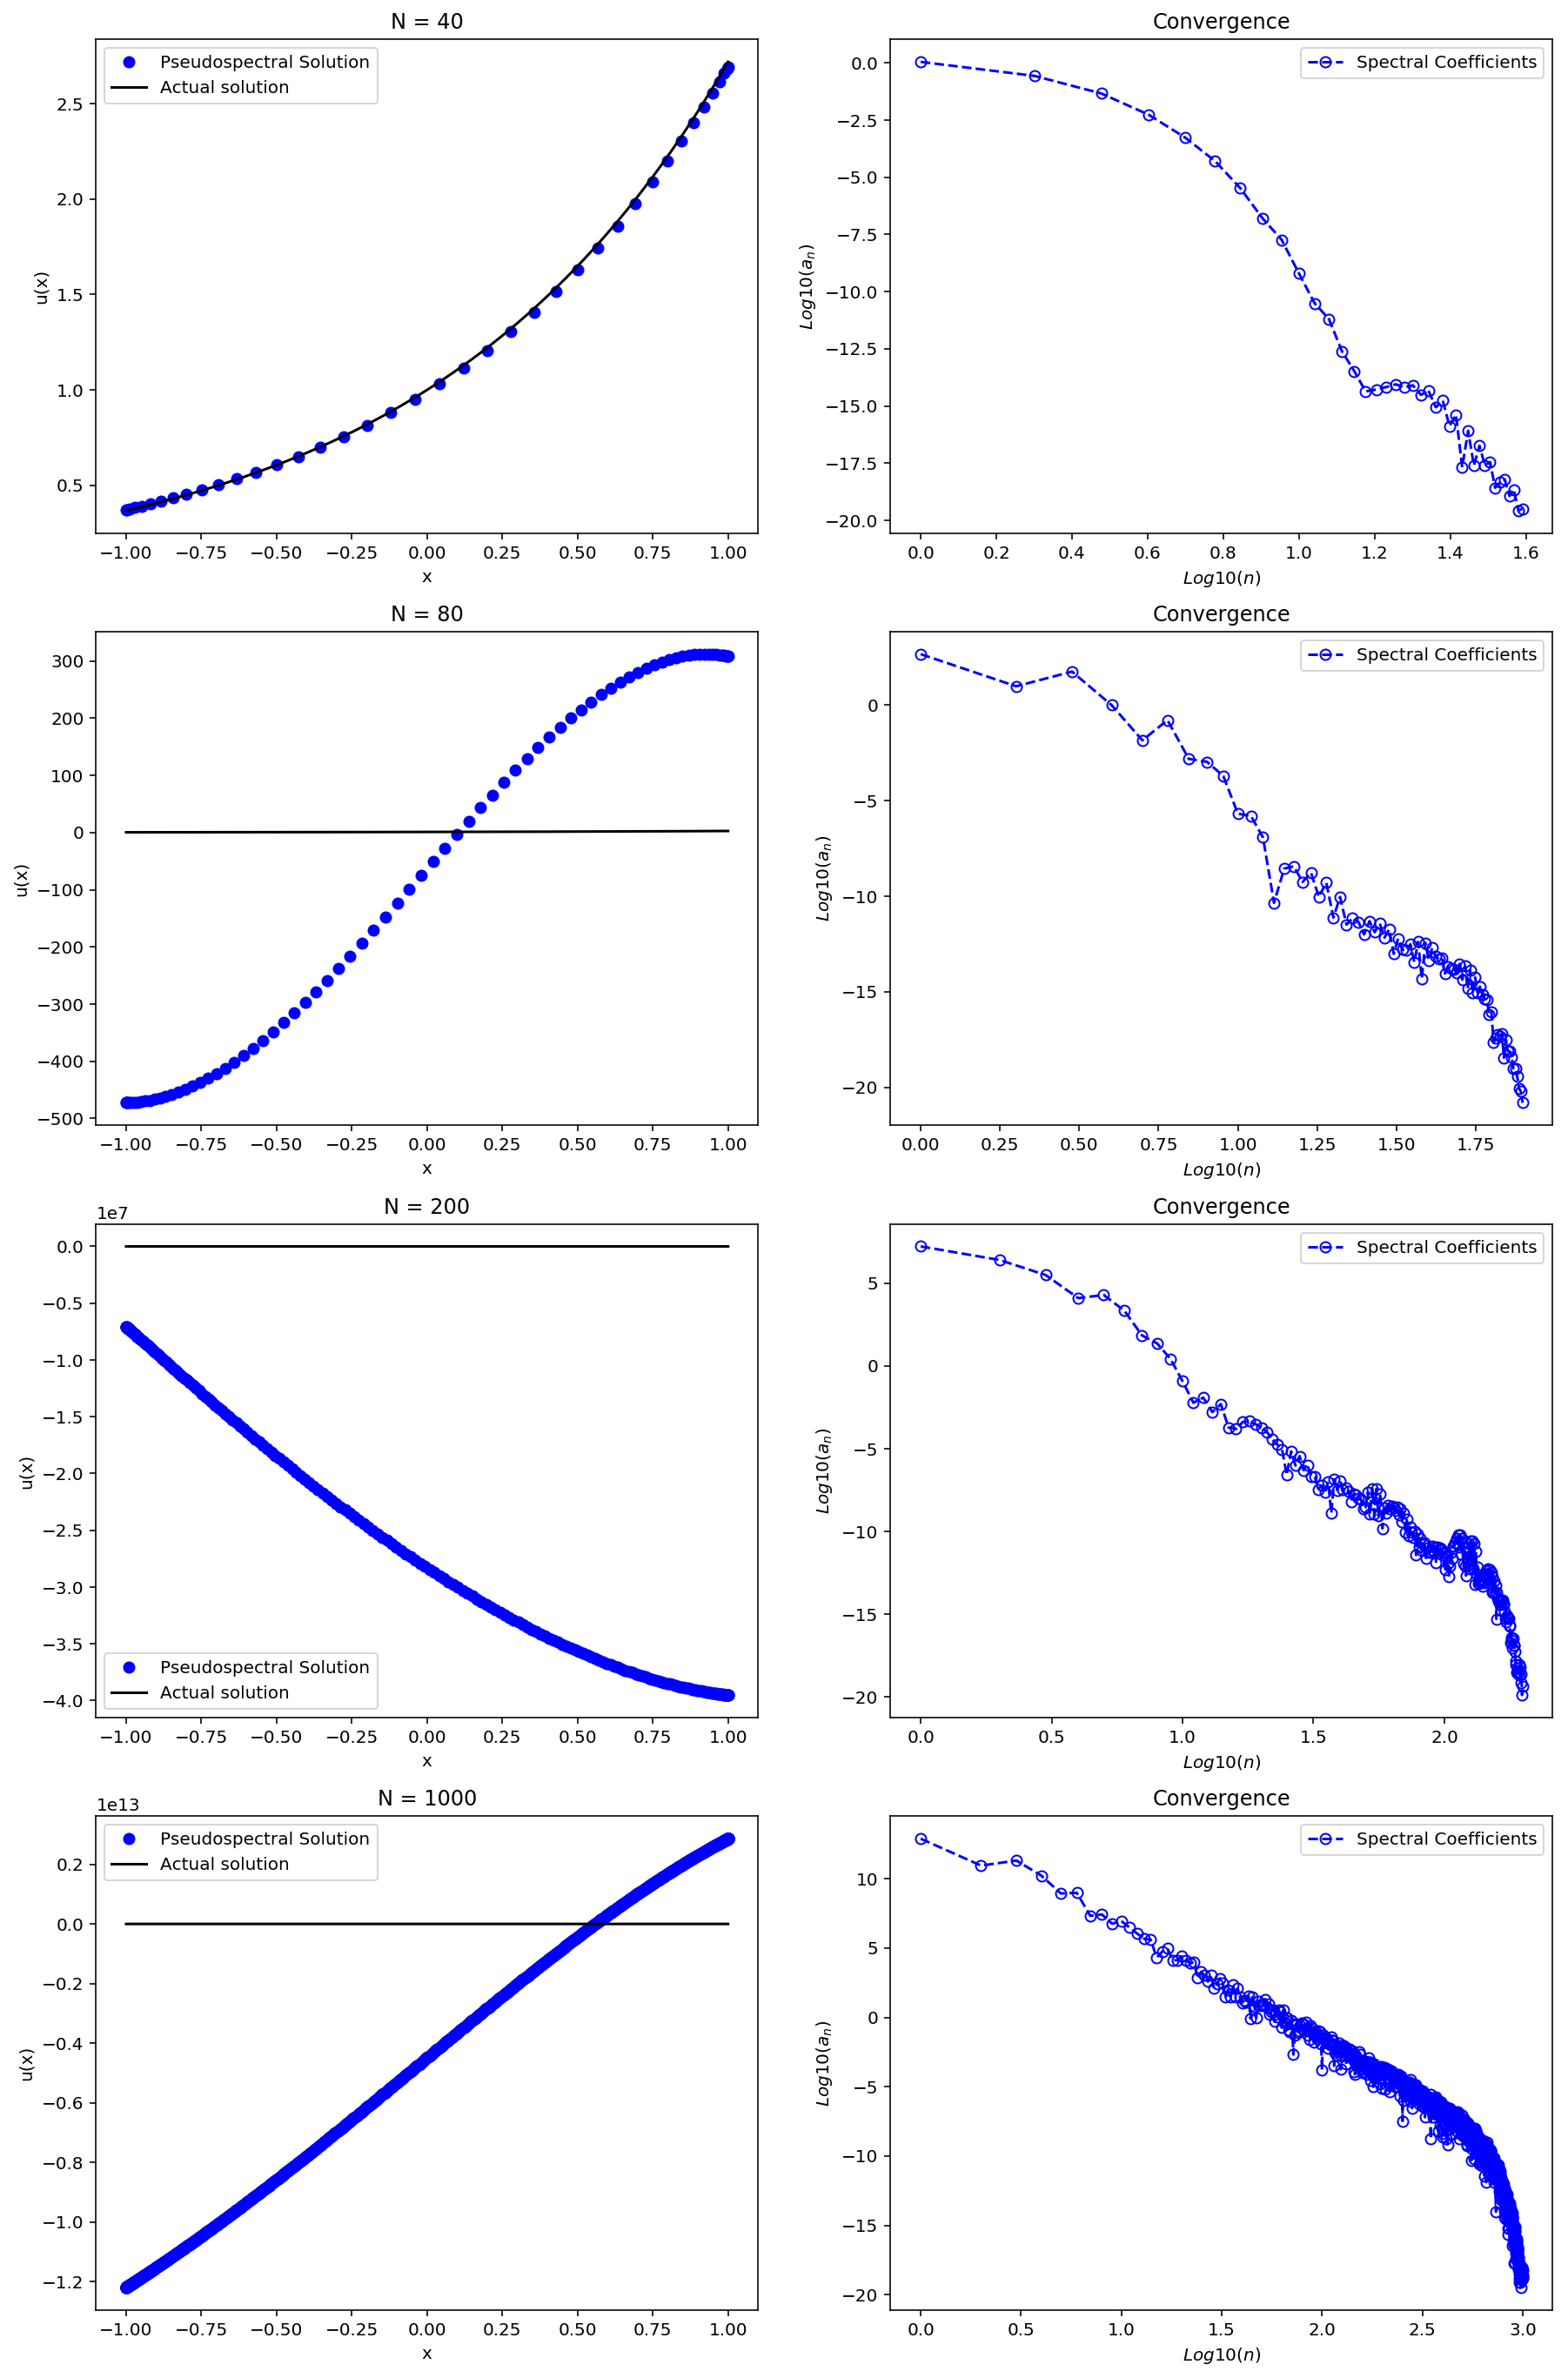

In [590]:
x2 = np.linspace(-1,1,10*N)

# actual solution
u = np.exp(x2)

# Trunctation test 1
#T5 = T
#A5 = A
#N5 = N
#x5 = x
#u_int1 = np.dot(T5,A5)

fig = plt.figure(figsize=(15,24))
ax1 = fig.add_subplot(421)

ax1.plot(x5, u_int1, 'o', color='blue', label='Pseudospectral Solution')
ax1.plot(x2, u, color='black', label='Actual solution')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.set_title('N = 40')
ax1.legend()

ax2 = fig.add_subplot(422)

ax2.plot(np.log10(np.arange(N5)), np.log10(np.abs(A5)), 'o--',
                 color='blue', mfc='none', label='Spectral Coefficients')
ax2.set_xlabel('$Log10(n)$')
ax2.set_ylabel('$Log10(a_n)$')
ax2.set_title('Convergence')
ax2.legend()
#------------------------

# Truncation test 2
#T2 = T
#A2 = A
#N2 = N
#x6 = x
#u_int2 = np.dot(T2,A2)

ax2 = fig.add_subplot(423)

ax2.plot(x6, u_int2, 'o', color='blue', label='Pseudospectral Solution')
ax2.plot(x2, u, color='black', label='Actual solution')
ax2.set_xlabel('x')
ax2.set_ylabel('u(x)')
ax2.set_title('N = 80')

ax2 = fig.add_subplot(424)

ax2.plot(np.log10(np.arange(N2)), np.log10(np.abs(A2)), 'o--',
                 color='blue', mfc='none', label='Spectral Coefficients')
ax2.set_xlabel('$Log10(n)$')
ax2.set_ylabel('$Log10(a_n)$')
ax2.set_title('Convergence')
ax2.legend()
#-------------------------

# Truncation test 3
#T3 = T
#A3 = A
#N3 = N
#x7 = x
#u_int3 = np.dot(T3,A3)

ax1 = fig.add_subplot(425)

ax1.plot(x7, u_int3, 'o', color='blue', label='Pseudospectral Solution')
ax1.plot(x2, u, color='black', label='Actual solution')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.set_title('N = 200')
ax1.legend()

ax2 = fig.add_subplot(426)

ax2.plot(np.log10(np.arange(N3)), np.log10(np.abs(A3)), 'o--',
                 color='blue', mfc='none', label='Spectral Coefficients')
ax2.set_xlabel('$Log10(n)$')
ax2.set_ylabel('$Log10(a_n)$')
ax2.set_title('Convergence')
ax2.legend()
#-------------------------

# Truncation test 4
#T4 = T
#A4 = A
#N4 = N
#x8 = x
#u_int4 = np.dot(T4,A4)

ax1 = fig.add_subplot(427)

ax1.plot(x8, u_int4, 'o', color='blue', label='Pseudospectral Solution')
ax1.plot(x2, u, color='black', label='Actual solution')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.set_title('N = 1000')
ax1.legend()

ax2 = fig.add_subplot(428)

ax2.plot(np.log10(np.arange(N4)), np.log10(np.abs(A4)), 'o--',
                 color='blue', mfc='none', label='Spectral Coefficients')
ax2.set_xlabel('$Log10(n)$')
ax2.set_ylabel('$Log10(a_n)$')
ax2.set_title('Convergence')
ax2.legend()

plt.show()

HTML('''
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">[Toggle Code]</a>
''')

<h3> Test 2: </h3>
$$
u(x) = x^4 \\
p(x) = -x \\
q(x) = x \\
f(x) = 24 - 12x^3 + x^5
$$

/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


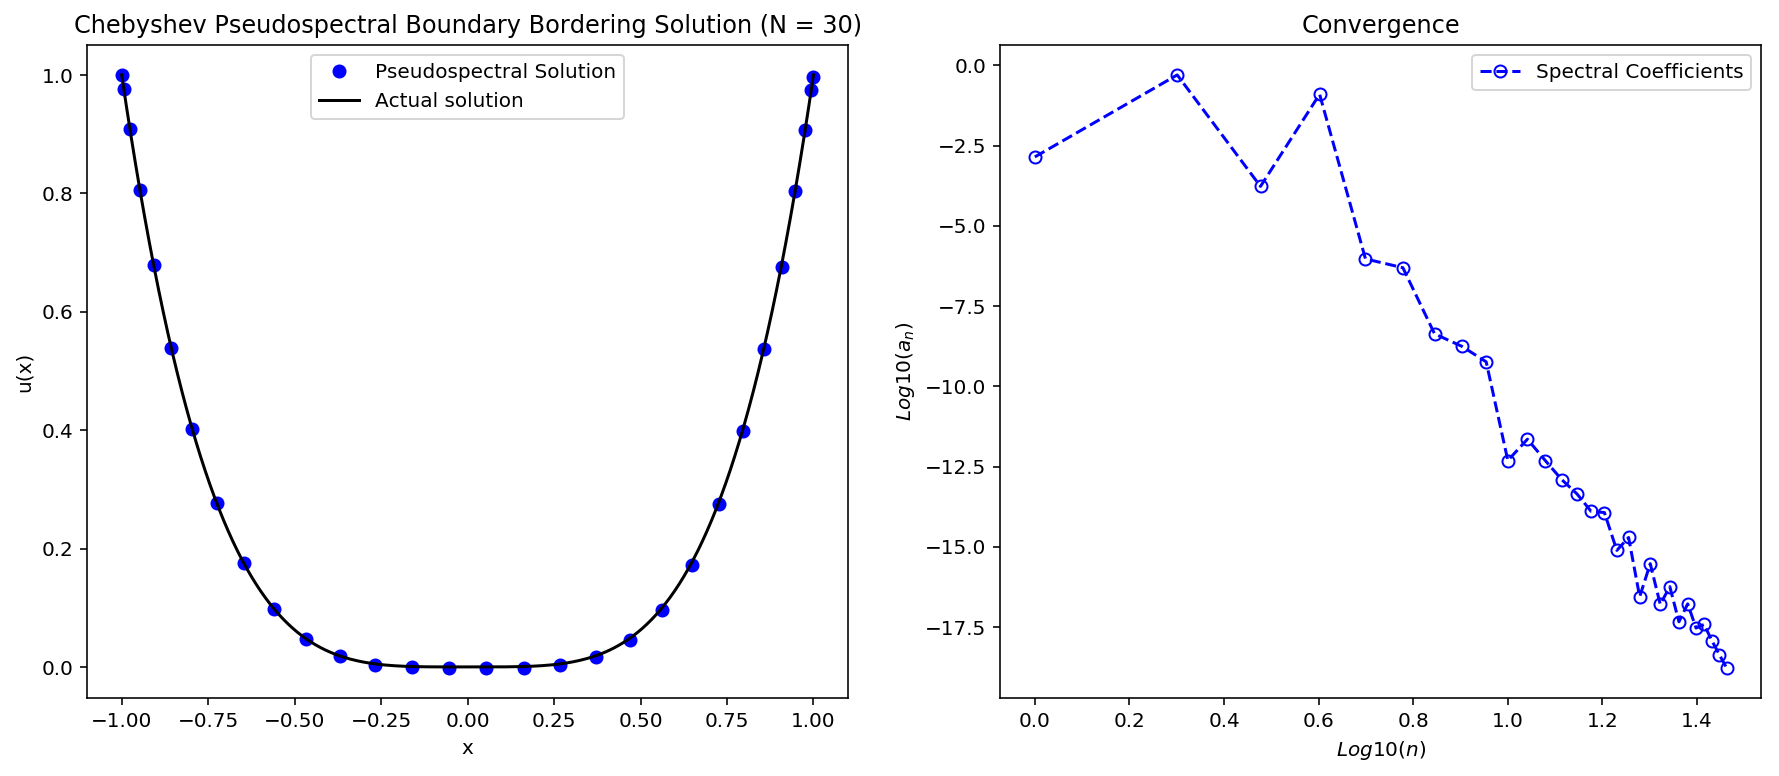

In [498]:
x2 = np.linspace(-1,1,10*N)

# actual solution
#u = np.exp(-10*x**2)
u = x2**4

# interpolated solution
u_int = np.dot(T,A)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)

ax1.plot(x, u_int, 'o', color='blue', label='Pseudospectral Solution')
ax1.plot(x2, u, color='black', label='Actual solution')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.set_title('Chebyshev Pseudospectral Boundary Bordering Solution (N = 30)')
ax1.legend()

ax2 = fig.add_subplot(122)

ax2.plot(np.log10(np.arange(N)), np.log10(np.abs(A)), 'o--',
                 color='blue', mfc='none', label='Spectral Coefficients')
ax2.set_xlabel('$Log10(n)$')
ax2.set_ylabel('$Log10(a_n)$')
ax2.set_title('Convergence')
ax2.legend()

plt.show()

<h6> The rate of convergence is approximately supergeometric for both the test cases.